In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


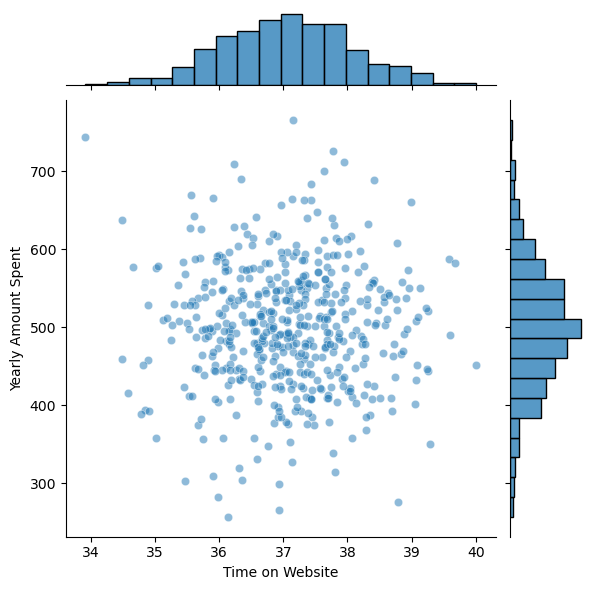

In [6]:
# EDA

sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data= df, alpha=0.5)

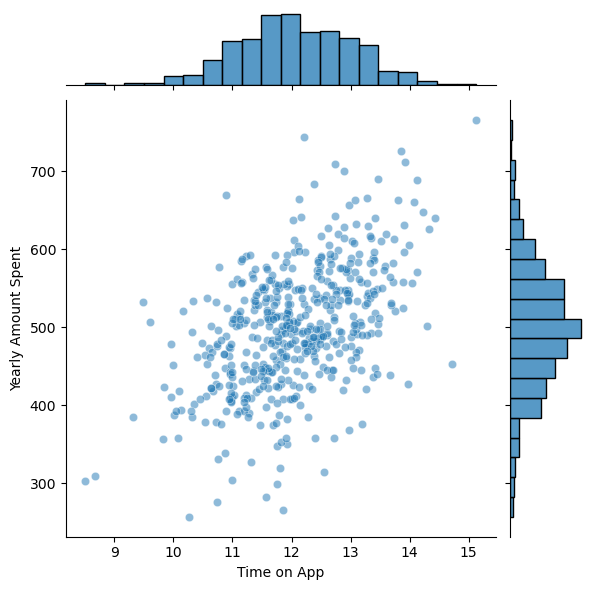

In [7]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data= df, alpha=0.5)

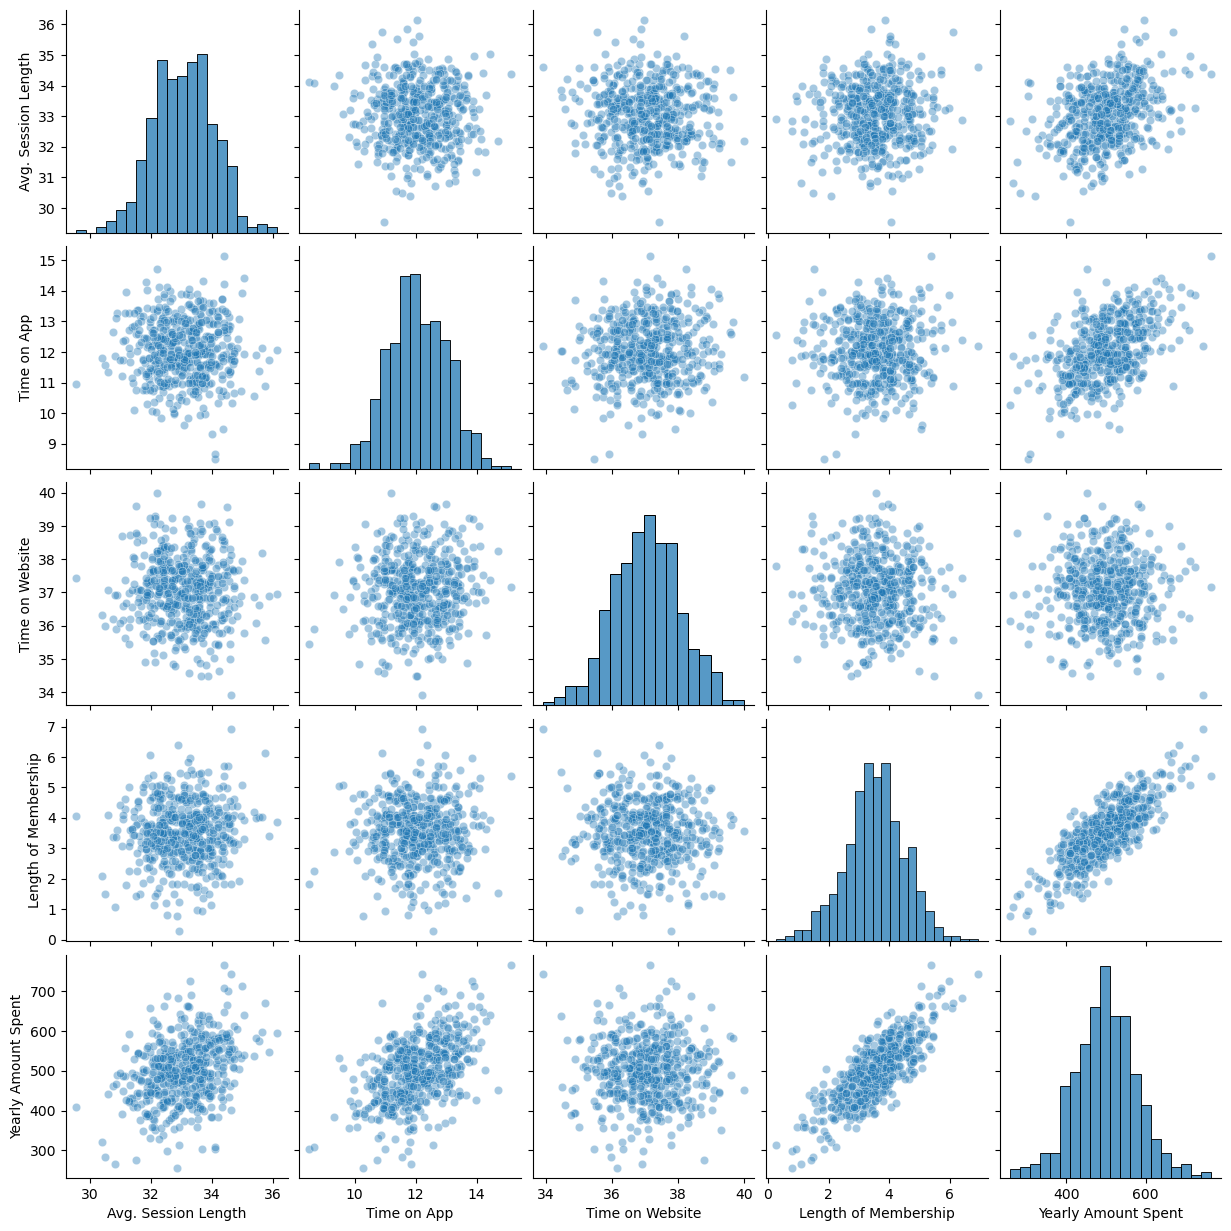

In [10]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4})

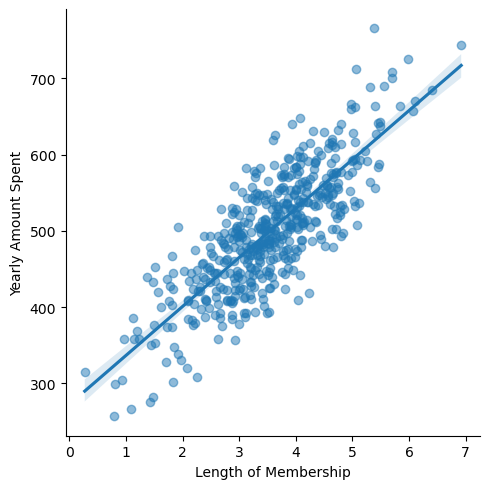

In [11]:
sns.lmplot(x="Length of Membership",
           y="Yearly Amount Spent",
           data= df,
           scatter_kws={'alpha':0.5})

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X= df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y= df[['Yearly Amount Spent']]

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 42)

In [15]:
# training on the data

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr= LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.coef_

array([[25.72425621, 38.59713548,  0.45914788, 61.67473243]])

In [23]:
cdf= pd.DataFrame(lr.coef_[0], X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [24]:
# prediction

In [25]:
predictions= lr.predict(X_test)

In [26]:
predictions

array([[403.66993069],
       [542.57756289],
       [427.06591658],
       [502.02460425],
       [410.12143559],
       [569.93442508],
       [531.93431341],
       [506.29650969],
       [408.71870658],
       [473.97737105],
       [441.46912726],
       [425.33703059],
       [425.1297229 ],
       [527.61676714],
       [431.45684016],
       [424.0769184 ],
       [575.76543296],
       [484.89856554],
       [458.35936863],
       [481.96502182],
       [502.32441491],
       [513.63783554],
       [507.58877002],
       [646.57464283],
       [450.24372141],
       [496.27043415],
       [556.40457807],
       [554.95630839],
       [399.64237199],
       [325.84623136],
       [532.89783259],
       [478.12238702],
       [501.05701845],
       [305.97335848],
       [505.77244448],
       [483.79591969],
       [518.8331528 ],
       [438.18241857],
       [456.71094234],
       [471.04609461],
       [494.44008972],
       [445.31155755],
       [508.78802753],
       [501

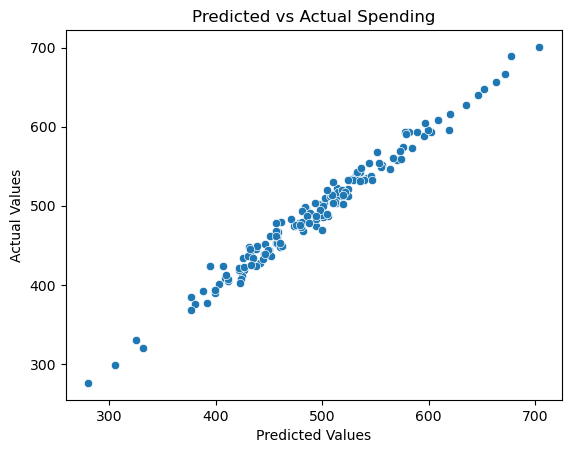

In [36]:
sns.scatterplot(x=np.ravel(predictions), y=np.ravel(y_test))
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Spending")
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [40]:
mae= mean_absolute_error(predictions,y_test)
mse= mean_squared_error(predictions,y_test)
rms= math.sqrt(mse)

In [44]:
print("Mean_absolute_error: ",mae)
print("Mean_squared_error: ",mse)
print("Root mean squarer: ",rms)

Mean_absolute_error:  8.426091641432086
Mean_squared_error:  103.91554136503323
Root mean squarer:  10.19389726086315


In [45]:
# residuals

In [64]:
residuals = np.array(y_test).flatten() - np.array(predictions).flatten()


In [65]:
residuals

array([ -2.63679547,  -7.80037479,  -8.46317449,   1.9537748 ,
        -0.05182453, -12.32616303,   7.00766112,   8.04004857,
        -0.09851875,   1.03803604, -14.26974236,   8.68466916,
       -13.94275933,   5.89816812,  15.91218704, -16.53475038,
        -1.91799525,  12.68810576,   8.06183019, -14.16409746,
         8.07697354,  -3.13635707,   4.39108997,  -5.99058094,
        -5.95781391,   6.50064042,  -4.7844326 ,  -6.43777911,
        -9.53909902,   4.74821467,   2.4237775 ,   0.47852893,
        -1.916866  ,  -7.21135062, -18.22493961,  14.8396788 ,
        -6.66728641,   6.78413309,  11.95752326,  12.11362618,
       -19.90776028,  -6.23679081,   6.71445214, -15.1228114 ,
         2.23822695,   9.39906831,  -7.25024405,   8.29025588,
        -4.84916247,   3.41448206,  -3.55815317,  12.48279146,
       -11.40750047,  -0.50299299, -18.03964213, -11.05474067,
        29.66416022,  -4.10407742,  -4.37009922, -10.91236301,
        -2.17097803, -15.62749971,  -6.6900814 ,  -2.29

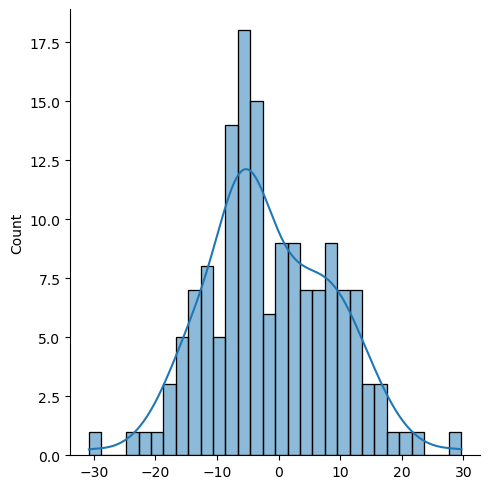

In [66]:
sns.displot(residuals,bins=30, kde=True)

In [ ]:
# alternate approach using QQ plot

In [67]:
import scipy.stats as stats
import pylab

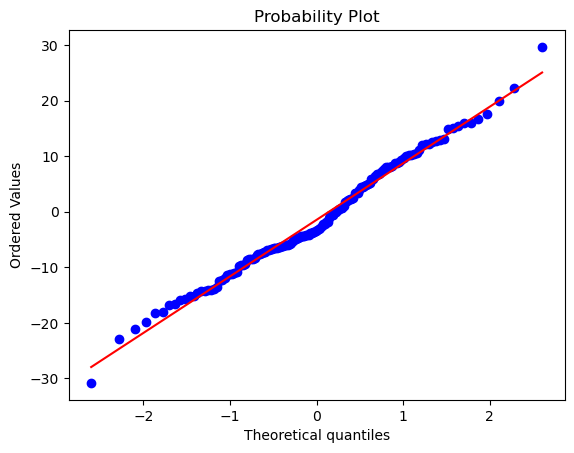

In [68]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()